### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than $12500, $12500 - $24999, $25000 - $37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    
2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.

In [150]:
data = pd.read_csv('data/coupons.csv')

In [151]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### 3. Decide what to do about your missing data -- drop, replace, other...

In [153]:
# Drop the `cars' column because it does not contain any useful information 
data.drop('car', axis=1, inplace=True)

In [154]:
# Get the count of missing values in each column and only keep the columns with missing values
missing = data.isnull().sum()
missing = missing[missing > 0]
missing

Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64

In [155]:
# Fill the missing values in these column with 'never'
data['Bar'].fillna('never', inplace=True)
data['CoffeeHouse'].fillna('never', inplace=True)
data['CarryAway'].fillna('never', inplace=True)
data['RestaurantLessThan20'].fillna('never', inplace=True)
data['Restaurant20To50'].fillna('never', inplace=True)

#### 4. What proportion of the total observations chose to accept the coupon? 

Text(0.5, 0, 'Acceptance')

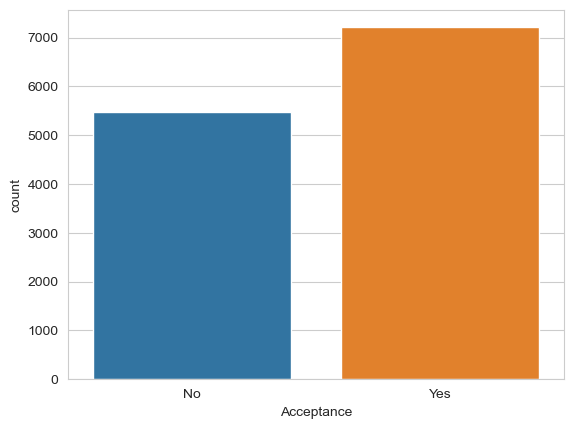

In [156]:
# plot a histogram using seaborn to visualize the distribution of the target variable Y.
sns.countplot(x='Y', data=data)
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Acceptance')

In [157]:
print('Proportion of the total observations chose to accept the coupon: {:.2f}%'.format(data['Y'].mean() * 100))

Proportion of the total observations chose to accept the coupon: 56.84%


#### 5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

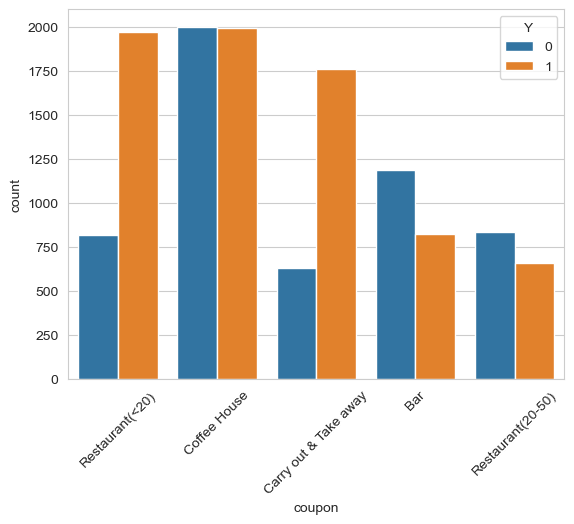

In [158]:
sns.countplot(x='coupon', hue='Y', data=data)
plt.xticks(rotation=45)

#### 6. Use a histogram to visualize the temperature column.

<AxesSubplot: xlabel='temperature', ylabel='Count'>

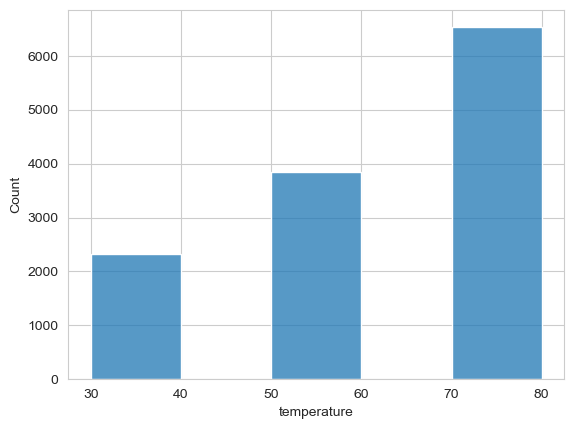

In [159]:
# Use a histogram to visualize the temperature column.
sns.histplot(data['temperature'], bins=3, binwidth=10)

### Investigating the Bar Coupons

Now, we will lead you through an exploration of just the bar related coupons.  

#### 1. Create a new `DataFrame` that contains just the bar coupons.

In [160]:
bar = data[data['coupon'] == 'Bar']

#### 2. What proportion of bar coupons were accepted?

In [161]:
print('Proportion of the bar coupons were accepted: {:.2f}%'.format(bar['Y'].mean() * 100))

Proportion of the bar coupons were accepted: 41.00%


#### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

Acceptance rate for those who went to a bar 3 or fewer times a month: 56.16%
Acceptance rate for those who went to a bar more than 3 times a month: 62.25%


<AxesSubplot: xlabel='Bar', ylabel='count'>

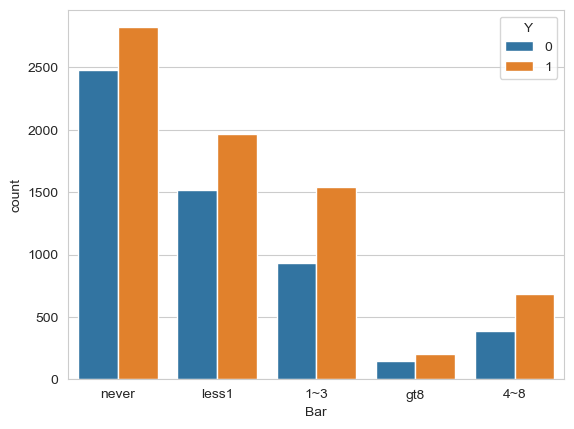

In [162]:
# Get the count of rows in the 'Bar' column where the value is '1~3' OR 'less1' OR 'never'
three_or_fewer = data[data['Bar'].isin(['1~3', 'less1', 'never'])]
more_than_three = data[data['Bar'].isin(['4~8', 'gt8'])]

# print the acceptance rate for each group
print('Acceptance rate for those who went to a bar 3 or fewer times a month: {:.2f}%'.format(three_or_fewer['Y'].mean() * 100))
print('Acceptance rate for those who went to a bar more than 3 times a month: {:.2f}%'.format(more_than_three['Y'].mean() * 100))

sns.countplot(data=data, x='Bar', hue='Y')

The acceptance rate for customers that went less than 1 time is smaller that those that went to a bar at least 1 time. The acceptance rate tends to be higher for those that go to a bar more than 3 times a month but there are less of those customers.

#### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

Acceptance rate for those who went more than once a month and are over the age of 25: 62.15%
Acceptance rate for those who went less than once a month and are under the age of 25: 59.40%


[Text(0.5, 1.0, 'Went to a bar less than once a month and are under the age of 25')]

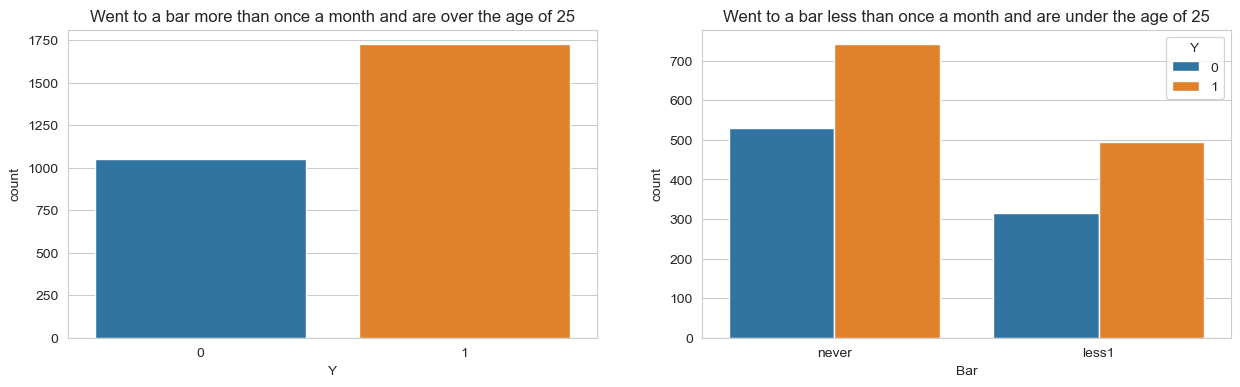

In [163]:
# Get the count of rows in the 'Bar' column where the value is '1~3' OR '4~8' OR 'gt8' and the 'age' column is NOT 'below21' OR '21'
mask1 = data['Bar'].isin(['1~3', '4~8', 'gt8'])
mask2 = ~data['age'].isin(['below21', '21'])
more_than_once_over_25 = data[mask1 & mask2]


mask3 = data['age'].isin(['below21', '21'])
mask4 = ~data['Bar'].isin(['1~3', '4~8', 'gt8'])
less_than_once_under_25 = data[mask3 & mask4]

# print the acceptance rate for each group
print('Acceptance rate for those who went more than once a month and are over the age of 25: {:.2f}%'.format(more_than_once_over_25['Y'].mean() * 100))
print('Acceptance rate for those who went less than once a month and are under the age of 25: {:.2f}%'.format(less_than_once_under_25['Y'].mean() * 100))

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.countplot(data=more_than_once_over_25, x='Y', ax=ax[0], ).set(title='Went to a bar more than once a month and are over the age of 25')
sns.countplot(data=less_than_once_under_25, x='Bar', hue='Y', ax=ax[1]).set(title='Went to a bar less than once a month and are under the age of 25')

#### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 

In [164]:
data['passanger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

Text(0.5, 0, 'Acceptance')

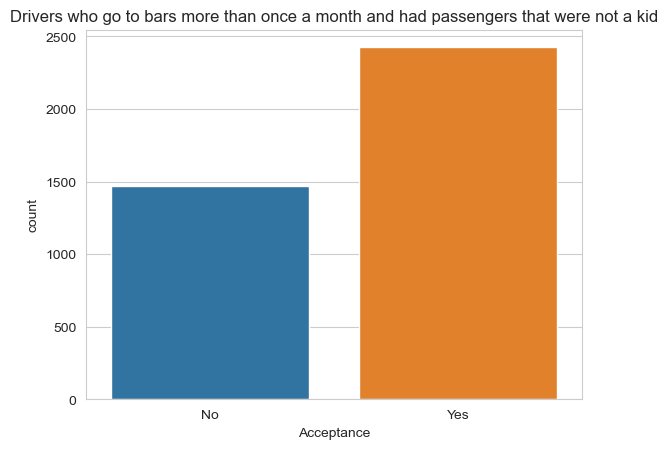

In [165]:
drinker = data['Bar'].isin(['1~3', '4~8', 'gt8'])
no_kids = ~data['passanger'].isin(['Kids(s)'])
no_kids_and_drinker = data[drinker & no_kids]

sns.countplot(x='Y', data=no_kids_and_drinker)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Drivers who go to bars more than once a month and had passengers that were not a kid')
plt.xlabel('Acceptance')

#### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [166]:
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [192]:
cheap_restaurants = data['RestaurantLessThan20'].isin(['4~8', 'less1', 'gt8'])
low_income = data['income'].isin(['$25000 - $37499', '$12500 - $24999', '$37500 - $49999'])
not_widowed = ~data['maritalStatus'].isin(['Widowed'])

new_data = data[
    (drinker & no_kids & not_widowed) | 
    (drinker & data['age'].isin(['below21', '21', '26'])) | 
    (cheap_restaurants & low_income)
]

print('Acceptance rate for all conditions above is: {:.2f}%'.format(new_data['Y'].mean() * 100))

Acceptance rate for all conditions above is: 59.88%


Text(0.5, 0, 'Acceptance')

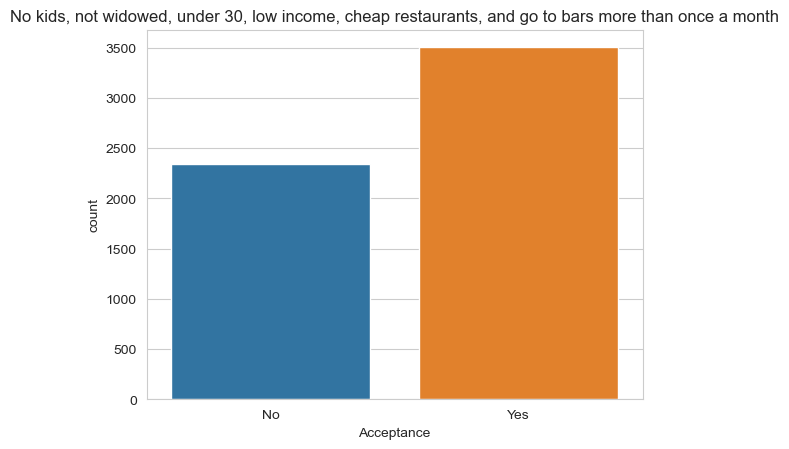

In [194]:
sns.countplot(x='Y', data=new_data)
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('No kids, not widowed, under 30, low income, cheap restaurants, and go to bars more than once a month')
plt.xlabel('Acceptance')

#### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

##### Answer
* People over the age of 25 who go to bars more than once a month and have passengers that are not kids are more likely to accept the bar coupons.
* People below 30 years of age who go to bars more than once a month are more likely to accept the bar coupons, but not by much.
* The company should focus in drivers over 25, not traveling with kids, and go to bars more than once a month.